# **Comprensión de los precios de las viviendas en Boston**

El dataset a utilizar contiene 506 observaciones de 14 variables, incluyendo los precios de venta de propiedades en la ciudad de Boston. Más información en https://www.kaggle.com/altavish/boston-housing-dataset.

El objetivo de este proyecto es comprender qué variables en estudio impulsan el precio de las viviendas en Boston y elaborar un modelo que prediga los precios de venta.

In [1]:
import pandas as pd
housing_data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Preparación del dataset**

Cada registro describe un pueblo o barrio de Boston. Los datos fueron extraídos de Boston Standard Metropolitan Statistical Area (SMSA) en 1970. Los atributos se definen de la siguiente forma:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT -  lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

### **Tratamiento de valores nulos**

In [2]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Encontramos que hay valores nulos presentes en muchos atributos (CRIM, ZN, INDUS, CHAS, AGE, LSTAT). Habrá que completar estos registros con nuevos valores si queremos utilizar estos atributos.

In [3]:
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Otra opción es eliminar estos registros dado que representan un 4% de los datos solamente (20 de 504). Pero antes hay que fijarse que los datos nulos estén en los mismos registros para todas los atributos.

In [4]:
#housing_data[housing_data.CRIM.isnull()+housing_data.ZN.isnull()+housing_data.INDUS.isnull()+housing_data.CHAS.isnull()+housing_data.AGE.isnull()+housing_data.LSTAT.isnull()]
housing_data[housing_data.CRIM.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
53,NaN,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
115,NaN,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6,432,17.8,344.91,15.76,18.3
183,NaN,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5
191,NaN,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
196,NaN,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
229,NaN,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
236,NaN,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,25.1
241,NaN,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1
262,NaN,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8


Lo que encuentro es que los valores nulos no se encuentran en los mismos registros para todos los atributos. Evalúo con cuántos datos me quedaría en caso de eliminar todos los registros con algún valor nulo.

In [5]:
housing_data.dropna(how='any').shape

(394, 14)

Vemos que me quedaría con 394 registros, por lo que el total de registros con algún dato nulo es de 112 (alrededor del 20% de los datos totales). Por lo tanto no sería conveniente eliminar todos estos registros. Decido completarlos con nuevos valores. Para ello investigo si estos registros siguen algún tipo de distribución.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f337bbf9fd0>,
      dtype=object)

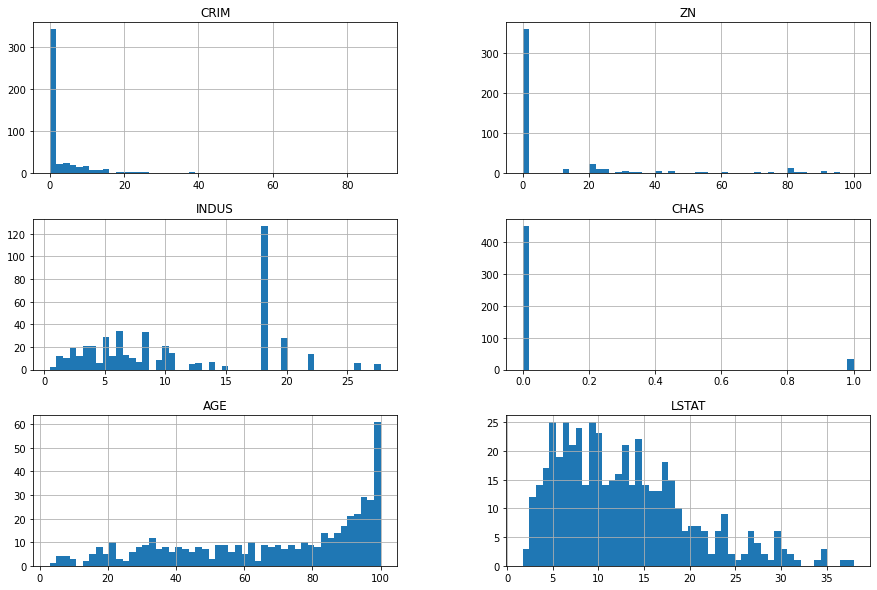

In [6]:
housing_data.hist(column = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], figsize = [15,10], bins = 50)

Observando uno a uno estos atributos decido para los casos de 'ZN' y 'CHAS' reemplazar los valores nulos por el valor numérico 0, dado que este valor es demasiado frecuente en estos atributos. Para el resto de atributos elijo reemplazar los valores nulos por sus respectivas medias.

In [7]:
housing_data["ZN"].fillna(0.0,inplace=True)
housing_data["CHAS"].fillna(0.0,inplace=True)

housing_data["CRIM"].fillna(housing_data["CRIM"].mean(),inplace=True)
housing_data["INDUS"].fillna(housing_data["INDUS"].mean(),inplace=True)
housing_data["AGE"].fillna(housing_data["AGE"].mean(),inplace=True)
housing_data["LSTAT"].fillna(housing_data["LSTAT"].mean(),inplace=True)

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Una vez que reemplazamos los valores nulos, continuamos con el procesamiento de los datos previo a aplicar los modelos de regresión. 

### **Correlación**

Comencemos por visualizar la correlación de cada atributo de entrada con el de salida MEDV.

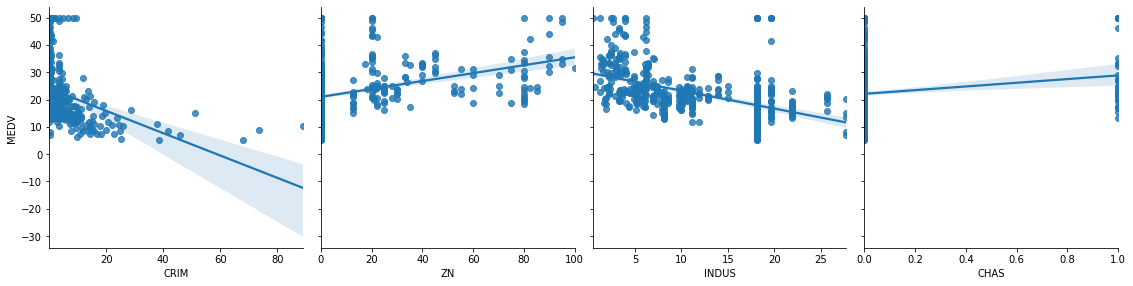

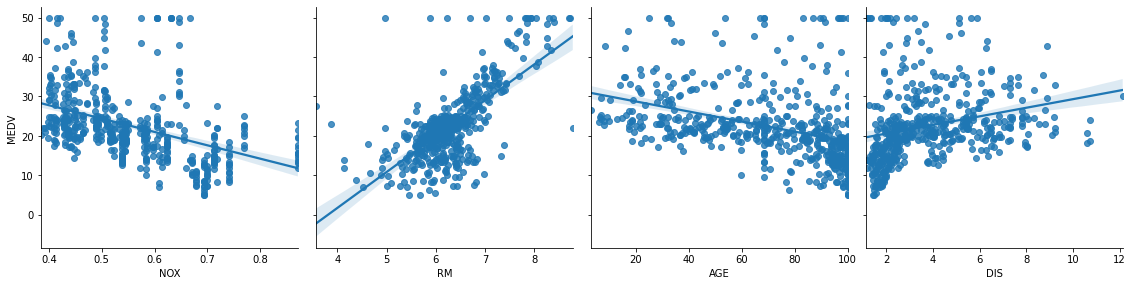

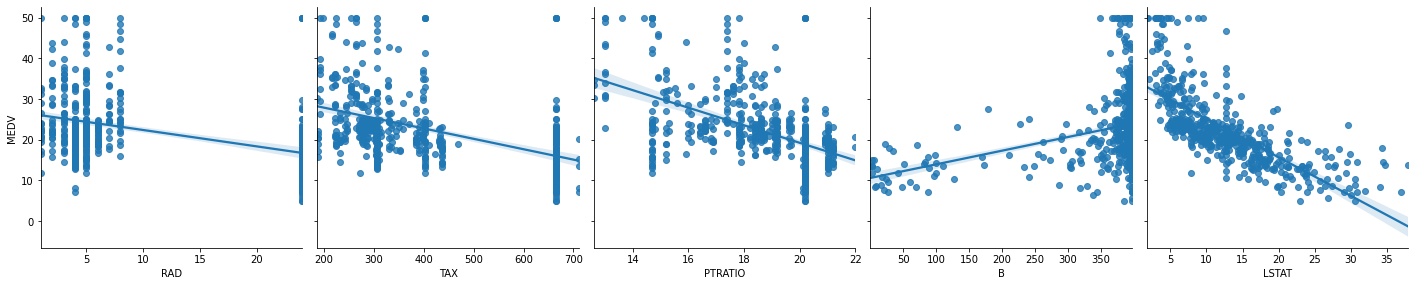

In [8]:
import seaborn as sns

sns.pairplot(housing_data, x_vars=['CRIM','ZN','INDUS','CHAS'], y_vars='MEDV', height=4,  kind='reg') 
sns.pairplot(housing_data, x_vars=['NOX','RM','AGE','DIS'], y_vars='MEDV', height=4,  kind='reg') 
sns.pairplot(housing_data, x_vars=['RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV', height=4,  kind='reg') 

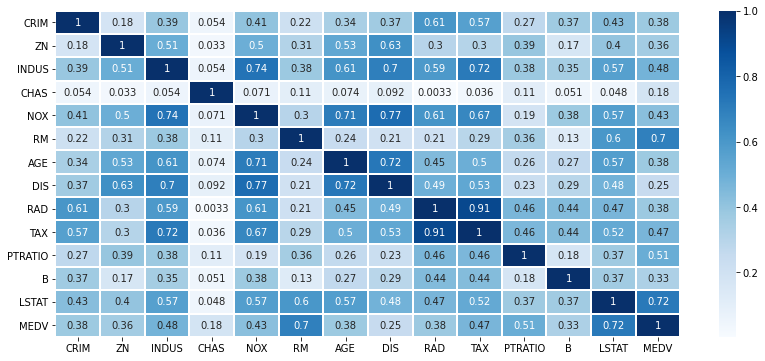

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
corr = abs(housing_data.corr())
sns.heatmap(corr, annot=True, linewidth=1, cmap='Blues')

Lo que observamos es que los atributos 'RM' y 'LSTAT' son los que presentan correlación más alta con la variable de salida 'MEDV' (0.7 y 0.72, respectivamente), por lo que probablemente sean los que más impulsen el precio de las viviendas. Esto lo intentaremos confirmar cuando apliquemos el regresor lineal.

Por otra parte, observamos que las variables 'RAD' y 'TAX' presentan multicolinealidad. Esto puede generar un problema a la hora de interpretar la importancia de las variables luego de aplicar el regresor múltiple, ya que al estar dos variables independientes correlacionadas entre sí, cambios en una variable vendrán directamente relacionados con cambios en la otra. Entonces se hace difícil estimar la relación entre la variable de salida con cada una de las variables de entrada independientemente de las demás, ya que no serán confiables los coeficientes del regresor que utilicemos. En base a esto, decido desprenderme de uno de los dos atributos, en particular de 'RAD' por ser el que menos correlación con la variable de salida presenta.

In [10]:
housing_data = housing_data.drop(columns='RAD')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,12.715432,36.2


### **Valores Atípicos y Estandarización**

A continuación intentaremos identificar si tenemos valores atípicos mediante un box plot.

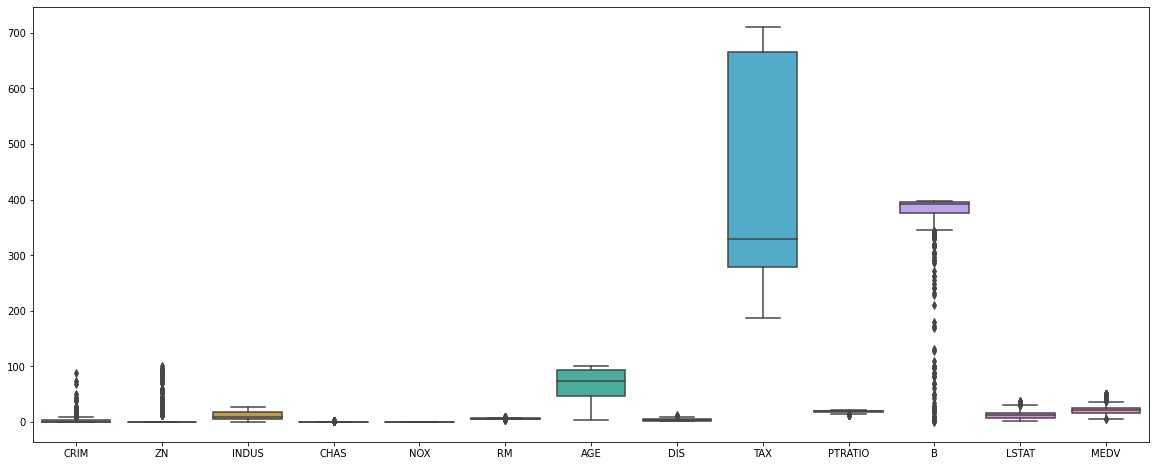

Column CRIM outliers = 12.65%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [11]:
import numpy as np

plt.figure(figsize = (20, 8))
sns.boxplot(data = housing_data, width = 0.8)
plt.show()

for k, v in housing_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(housing_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Observamos que muchos de los atributos cuentan con valores atípicos. Una forma de lidiar con estos valores es estandarizar los datos, lo que además nos servirá a la hora de aplicar regresión.

In [12]:
y = np.array(housing_data['MEDV'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = np.array(housing_data.drop(columns='MEDV'))
scaler.fit(x)
x = scaler.transform(x)

x.shape, y.shape

((506, 12), (506,))

## **Regresión Lineal**

Comenzaremos por separar los datos en conjuntos de entrenamiento y validación, quedándome con un 80% de datos para entrenar.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

LinearRegression es un regresor lineal de cuadrados mínimos que minimiza la suma al cuadrdado de los residuos. Lo aplicamos a nuestro conjunto de datos.

In [14]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
linear_train_score = linear_regressor.score(x_train,y_train)
print('Coeficiente R^2 = ', linear_train_score)

Coeficiente R^2 =  0.7605811422658664


In [15]:
labels = pd.Series(housing_data.drop(columns='MEDV').columns)
coefficients = pd.Series(linear_regressor.coef_)
d = {'Labels': labels, 'Coefficients': coefficients}
pd.DataFrame(data=d)

,Labels,Coefficients
0,CRIM,-0.821026
1,ZN,0.770174
2,INDUS,-0.752062
3,CHAS,0.777666
4,NOX,-1.439055
5,RM,2.978673
6,AGE,-0.644674
7,DIS,-2.948188
8,TAX,-0.041345
9,PTRATIO,-2.039174


Lo que observamos a partir de los coeficientes del modelo es que los atributos 'RM' y 'LSTAT' son los que más importancia tienen en los precios de venta de las casas. 

'RM' representa el número promedio de habitaciones por vivienda. Al tener coeficiente positivo significa que cuántas más habitaciones haya más caras serán las casas. 'LSTAT' representa poblaciones de clase baja. Al tener coeficiente negativo significa que cuánto más bajo sea el "status" de la población del lugar más baratas son las casas. Por lo que tiene sentido que estos atributos impulsen los precios de las viviendas.

Me llama la atención que el coeficiente del atributo 'DIS' sea tan alto considerando que la correlación que este atributo presenta con la salida 'MEDV' era bastante baja respecto a los demás atributos.

Una vez entrenado el modelo, podemos usarlo para hacer predicciones en el conjunto de validación y medir qué tan buena es dicha predicción.

In [16]:
linear_test_score = linear_regressor.score(x_test,y_test)
print('Coeficiente R^2 = ', linear_test_score)

Coeficiente R^2 =  0.546105080246255


Observamos que el coeficiente de determinación es mucho más bajo que para el caso de entrenamiento por lo que puede haber una chance de overfitting. Convendrá chequear esto usando regularización. Pero primero calculemos distintas métricas para evaluar este modelo.

In [17]:
from sklearn import metrics

y_pred = linear_regressor.predict(x_test)
linear_mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Absolute Error =", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error =",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error = 4.05689711282531
Mean Squared Error = 36.95995481367348
Root Mean Squared Error = 6.079469945124614


A priori da la sensación de que los errores son demasiado altos. Veamos el error por muestra en un diagrama de dispersión.

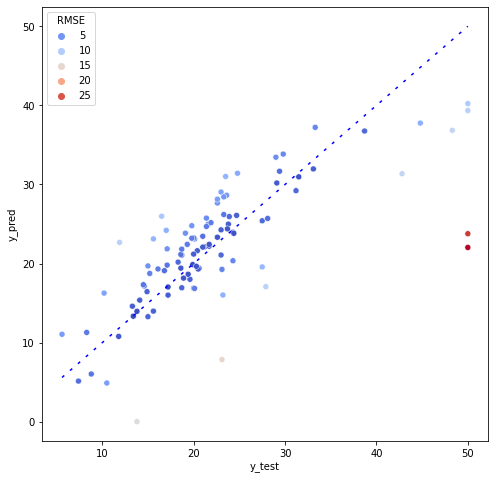

In [18]:
test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})

plt.figure(figsize=(8,8))

sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

# y_test = y_pred line. Cuanto más cerca estén los puntos de esta línea, mejor será la predicción.
X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])

Observamos que muy pocos puntos se encuentran cerca de la línea y_pred = y_test, por lo que el modelo está fallando a la hora de predecir datos nuevos. Utilicemos distintos métodos de regularización para ver si podemos mejorar el modelo.

### **Lasso Regression**

Lasso es un modelo lineal que introduce un término de regularización de norma l1 con coeficiente alpha. Dado que el parámetro alpha debe ser proporcionado por el usuario utilizaremos LassoCV para determinar el mejor valor de alpha.

In [19]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(max_iter = 100000)
lasso_cv.fit(x, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [20]:
lasso_alpha = lasso_cv.alpha_
lasso_alpha

0.061864348744551226

In [21]:
lasso = Lasso(alpha = lasso_alpha)
lasso.fit(x_train, y_train)
lasso_train_score = lasso.score(x_train,y_train)
print('Coeficiente R^2 = ', lasso_train_score)

Coeficiente R^2 =  0.7598247064987904


In [22]:
lasso_coefficients = pd.Series(lasso.coef_)
d = {'Labels': labels, 'Linear Coefficients': coefficients, 'Lasso Coefficients': lasso_coefficients}
pd.DataFrame(data=d)

,Labels,Linear Coefficients,Lasso Coefficients
0,CRIM,-0.821026,-0.748052
1,ZN,0.770174,0.639046
2,INDUS,-0.752062,-0.645378
3,CHAS,0.777666,0.735124
4,NOX,-1.439055,-1.272569
5,RM,2.978673,2.993462
6,AGE,-0.644674,-0.509432
7,DIS,-2.948188,-2.506609
8,TAX,-0.041345,-0.079827
9,PTRATIO,-2.039174,-2.044345


Observamos que el modelo Lasso arroja valores muy similares al regresor lineal, tanto para los coeficientes como para el R^2.

In [23]:
lasso_test_score = lasso.score(x_test,y_test)
print('Coeficiente R^2 = ', lasso_test_score)

Coeficiente R^2 =  0.5448912797948202


In [24]:
y_pred = lasso.predict(x_test)
lasso_mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Absolute Error =", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error =",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error = 4.03437383757547
Mean Squared Error = 37.05879268976644
Root Mean Squared Error = 6.087593341359658


No se observan cambios al introducir el modelo Lasso. Sigo probando con otros modelos.

### **Ridge Regression**

Ridge es un modelo lineal que introduce un término de regularización de norma l2 con coeficiente alpha. Dado que el parámetro alpha debe ser proporcionado por el usuario utilizaremos RidgeCV para determinar el mejor valor de alpha.

In [25]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 1, 50)
ridge_cv = RidgeCV(alphas = alphas)
ridge_cv.fit(x, y)

RidgeCV(alphas=array([0.95378882, 0.83338271, 0.02703603, 0.34518223, 0.37677644,
       0.45109672, 0.1832901 , 0.97471714, 0.79655795, 0.1532812 ,
       0.83795893, 0.72336859, 0.34520842, 0.14025732, 0.48677905,
       0.6351722 , 0.85673693, 0.01059523, 0.52258083, 0.29921162,
       0.25142032, 0.0779555 , 0.42011308, 0.6339547 , 0.18378435,
       0.07972465, 0.0962068 , 0.0811449 , 0.59557708, 0.91843224,
       0.21523267, 0.64602701, 0.90178117, 0.79633484, 0.37483757,
       0.61300605, 0.15764223, 0.97510134, 0.68609093, 0.22308023,
       0.95391448, 0.82545365, 0.26499605, 0.75356274, 0.4944628 ,
       0.74906383, 0.0564006 , 0.2390133 , 0.71097613, 0.27137731]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [26]:
ridge_alpha = ridge_cv.alpha_
ridge_alpha

0.9751013404763649

In [27]:
ridge = Ridge(alpha = ridge_alpha)
ridge.fit(x_train, y_train)
ridge_train_score = ridge.score(x_train,y_train)
print('Coeficiente R^2 = ', ridge_train_score)

Coeficiente R^2 =  0.7605765131972573


In [28]:
ridge_coefficients = pd.Series(ridge.coef_)
d = {'Labels': labels, 'Linear Coefficients': coefficients, 'Lasso Coefficients': lasso_coefficients, 'Ridge Coefficients': ridge_coefficients}
pd.DataFrame(data=d)

,Labels,Linear Coefficients,Lasso Coefficients,Ridge Coefficients
0,CRIM,-0.821026,-0.748052,-0.817678
1,ZN,0.770174,0.639046,0.765580
2,INDUS,-0.752062,-0.645378,-0.746675
3,CHAS,0.777666,0.735124,0.777663
4,NOX,-1.439055,-1.272569,-1.416854
5,RM,2.978673,2.993462,2.979005
6,AGE,-0.644674,-0.509432,-0.641684
7,DIS,-2.948188,-2.506609,-2.916138
8,TAX,-0.041345,-0.079827,-0.053010
9,PTRATIO,-2.039174,-2.044345,-2.034846


In [29]:
ridge_test_score = ridge.score(x_test,y_test)
print('Coeficiente R^2 = ', ridge_test_score)

y_pred = ridge.predict(x_test)
ridge_mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Absolute Error =", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error =",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coeficiente R^2 =  0.5456493947526164
Mean Absolute Error = 4.0555460366996074
Mean Squared Error = 36.99706057212362
Root Mean Squared Error = 6.082520906016158


Tampoco observamos cambios con el modelo Ridge.

### **Elastic Net**

Elastic Net es un modelo lineal que introduce dos términos de regularización de normas l1 y l2. Resulta bastante útil cuando hay varios atributos correlacionados entre sí, lo que ocurre en nuestro caso. Hay que especificar dos parámetros alpha y rho, que nuevamente lo haremos utilizando ElasticNetCV.

In [30]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = np.random.uniform(0, 1, 50)
elastic_net_cv = ElasticNetCV(l1_ratio = l1_ratios, alphas = None, cv = 10, max_iter = 100000)  #alphas=None are set automatically
elastic_net_cv.fit(x, y)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.04649814, 0.12804129, 0.26442019, 0.80394727, 0.96851362,
       0.95507731, 0.34311057, 0.40913333, 0.45968127, 0.16886443,
       0.57867773, 0.59047724, 0.54006984, 0.62835946, 0.69343618,
       0.68768497, 0.80519252, 0.96348133, 0.98895998, 0.25304298,
       0.40558739, 0.1117647 , 0.54056844, 0.89250031...
       0.92326717, 0.35928267, 0.30380781, 0.27309183, 0.84846052,
       0.69736596, 0.32849305, 0.90396658, 0.05790801, 0.95861886,
       0.33208518, 0.86131204, 0.44346052, 0.76073408, 0.42191009,
       0.87092629, 0.99385324, 0.02481075, 0.19831601, 0.91747379]),
             max_iter=100000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [31]:
elastic_net_alpha = elastic_net_cv.alpha_
elastic_net_l1_ratio = elastic_net_cv.l1_ratio_
elastic_net_alpha, elastic_net_l1_ratio

(0.21232747363277735, 0.044284570285582414)

Vemos que el mejor valor que encontró para l1 ratio es muy cercano a cero. Esto quiere decir que la penalización es casi en su totalidad l2, por lo que el modelo debería asemejarse a Ridge. Veamos

In [32]:
elastic_net = ElasticNet(alpha = elastic_net_alpha, l1_ratio = elastic_net_l1_ratio)
elastic_net.fit(x_train, y_train)
elastic_net_train_score = elastic_net.score(x_train,y_train)
print('Coeficiente R^2 = ', elastic_net_train_score)

Coeficiente R^2 =  0.7483775543946807


In [33]:
elastic_net_coefficients = pd.Series(elastic_net.coef_)
d = {'Labels': labels, 'Linear Coefficients': coefficients, 'Lasso Coefficients': lasso_coefficients, 'Ridge Coefficients': ridge_coefficients, 'Elastic Net Coefficients': elastic_net_coefficients}
pd.DataFrame(data=d)

,Labels,Linear Coefficients,Lasso Coefficients,Ridge Coefficients,Elastic Net Coefficients
0,CRIM,-0.821026,-0.748052,-0.817678,-0.694089
1,ZN,0.770174,0.639046,0.765580,0.586656
2,INDUS,-0.752062,-0.645378,-0.746675,-0.597485
3,CHAS,0.777666,0.735124,0.777663,0.745819
4,NOX,-1.439055,-1.272569,-1.416854,-0.670734
5,RM,2.978673,2.993462,2.979005,2.781641
6,AGE,-0.644674,-0.509432,-0.641684,-0.476897
7,DIS,-2.948188,-2.506609,-2.916138,-1.542377
8,TAX,-0.041345,-0.079827,-0.053010,-0.436175
9,PTRATIO,-2.039174,-2.044345,-2.034846,-1.811127


In [34]:
elastic_net_test_score = elastic_net.score(x_test,y_test)
print('Coeficiente R^2 = ', elastic_net_test_score)

y_pred = elastic_net.predict(x_test)
elastic_net_mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Absolute Error =", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error =",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coeficiente R^2 =  0.5146640461908611
Mean Absolute Error = 4.134035599890604
Mean Squared Error = 39.520149139296215
Root Mean Squared Error = 6.286505320072211


Observamos que este modelo no se parece a los demás en lo que respecta a los coeficientes encontrados. Los más significantes siguen siendo 'RM' y 'LSTAT' y vemos que el atributo 'DIS' dejó de ser tan significante como con los otros modelos.

Con ninguno de estos tres modelos que introducen términos de regularización logramos mejorar el valor del coeficiente de determinación cuando aplicamos los modelos al conjunto de testeo. En todos los casos el coeficiente R^2 es considerablemente más bajo. Sin embargo, al obtener valores de R^2 similares sirvió para entender que el modelo estuvo bien entrenado y que no hay overfitting.

### **RANSAC: RANdom SAmple Consensus**

RANSAC es un algoritmo de regresión robusto que sirve para fitear un modelo de regresión en presencia de outliers. Como veíamos en el box-plot el dataset cuenta con un gran número de outliers en muchos de sus atributos. RANSAC fitea un modelo utilizando subconjuntos aleatorios de inliers del dataset completo. El algoritmo separa el dataset original en conjuntos de inliers, por lo que el modelo resultante es estimado sólo a partir de estos inliers. 

A continuación intentaremos fitear el regresor lineal utilizando el algoritmo RANSAC en busca de mejores resultados.

In [35]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(base_estimator = linear_regressor, random_state=1)
ransac.fit(x, y)

ransac_score = ransac.score(x,y)

y_ransac = ransac.predict(x)
y_linear = linear_regressor.predict(x_test)

ransac_mse = metrics.mean_squared_error(y, y_ransac)

linear_list = [linear_test_score, metrics.mean_absolute_error(y_test, y_linear), metrics.mean_squared_error(y_test, y_linear), np.sqrt(metrics.mean_squared_error(y_test, y_linear))]
ransac_list = [ransac_score, metrics.mean_absolute_error(y, y_ransac), metrics.mean_squared_error(y, y_ransac), np.sqrt(metrics.mean_squared_error(y, y_ransac))]

errors = {'': ['R^2', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'], 'Linear': linear_list, 'RANSAC': ransac_list}
pd.DataFrame(data=errors)

,,Linear,RANSAC
0,R^2,0.546105,0.605408
1,Mean Absolute Error,4.056897,3.708832
2,Mean Squared Error,36.959955,33.311263
3,Root Mean Squared Error,6.079470,5.771591


Lo que observamos es que el algoritmo RANSAC mejora el coeficiente de determinación del regresor lineal y reduce los errores del modelo pero no de manera significativa. Siguen siendo valores que no conforman. Visto esto aplicaremos a continuación modelos de regresión no lineales.

## **Regresión No Paramétrica: Decision Trees**

Como último caso emplearemos un modelo no parámetrico de regresión sobre nuestro dataset. En particular utilizaremos el modelo DecisisonTreeRegressor el cual es un algoritmo basado en árboles de decisión.

In [36]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=1)
decision_tree.fit(x_train,y_train)

y_decision_tree = decision_tree.predict(x_test)

decision_tree_score = decision_tree.score(x_test,y_test)

decision_tree_mse = metrics.mean_squared_error(y_test, y_decision_tree)

decision_tree_list = [decision_tree_score, metrics.mean_absolute_error(y_test, y_decision_tree), metrics.mean_squared_error(y_test, y_decision_tree), np.sqrt(metrics.mean_squared_error(y_test, y_decision_tree))]

errors['Decision Tree'] = decision_tree_list
pd.DataFrame(data=errors)

,,Linear,RANSAC,Decision Tree
0,R^2,0.546105,0.605408,0.653001
1,Mean Absolute Error,4.056897,3.708832,3.353922
2,Mean Squared Error,36.959955,33.311263,28.255588
3,Root Mean Squared Error,6.079470,5.771591,5.315599


Observamos que con este algoritmo no parámetrico mejoramos lo que habíamos obtenido con el algoritmo RANSAC sobre el regresor lineal. Intentaremos hacer un grid search sobre los hiperparámetros del regresor decision tree para ver si es posible mejorar el score aún más.

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = { 'max_depth': [None,5,10,15],
           'criterion' : ['mse', 'friedman_mse', 'mae']}

reg = GridSearchCV(decision_tree, parameters)

reg.fit(x_train, y_train)
reg.best_params_, reg.best_score_

({'criterion': 'mae', 'max_depth': 5}, 0.7329719092537168)

In [38]:
best_decision_tree = reg.best_estimator_

best_decision_tree.fit(x_train,y_train)

y_decision_tree = best_decision_tree.predict(x_test)

best_decision_tree_score = best_decision_tree.score(x_test,y_test)

best_decision_tree_list = [best_decision_tree_score, metrics.mean_absolute_error(y_test, y_decision_tree), metrics.mean_squared_error(y_test, y_decision_tree), np.sqrt(metrics.mean_squared_error(y_test, y_decision_tree))]

errors['Best Decision Tree'] = best_decision_tree_list
pd.DataFrame(data=errors)

,,Linear,RANSAC,Decision Tree,Best Decision Tree
0,R^2,0.546105,0.605408,0.653001,0.606166
1,Mean Absolute Error,4.056897,3.708832,3.353922,3.172549
2,Mean Squared Error,36.959955,33.311263,28.255588,32.069314
3,Root Mean Squared Error,6.079470,5.771591,5.315599,5.662977


Observamos que grid search nos eligió el mejor modelo basándose en el R^2 obtenido con el conjunto de datos de entrenamiento. Sin embargo, esto resulta en un valor más bajo para el R^2 calculado a partir de los datos de testeo. De todas formas, vemos que utilizar un método no paramétrico de regresión resulta más conveniente para el presente dataset.